# Week4-4
## 【問題1】コンペティション内容の確認
---
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。

-    何を学習し、何を予測するのか  
>各申請者がローンを返済する能力を予測する
     
-    どのようなファイルを作りKaggleに提出するか
>提出物は、予測した確率と考察したターゲット間のROC曲線で評価したもの。
-    提出されたものはどういった指標値で評価されるのか
>テストセットにあるSK_ID_CURRごとに、目的変数の確率を予測する必要がある。
 ファイルにはヘッダーが含まれ、次の形式である必要があります。
 
![](Kaggle_evaluation.JPG)

## 【問題2】学習と検証
---
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。

検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [2]:
import pandas as pd

df_home = pd.read_csv("application_train.csv")

df_home

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 欠損値のデータを確認

# 数値で確認: 欠損値の数と％の表示
num_missing = df_home.isnull().sum().sort_values(ascending = False)
percent = (df_home.isnull().sum()/df_home.isnull().count()*100).sort_values(ascending = False)

home_missing = pd.concat([num_missing, percent], axis=1, keys=['num_missing', 'Percent'])

home_missing[home_missing['num_missing'] > 0]
# index_name = home_missing[home_missing['num_missing'] > 0].index
# print(index_name)


,num_missing,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


In [4]:
# 欠損値が1つでもあれば該当する列を削除する
df = df_home.dropna(axis=1, how="any")
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DO

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 相関関係
df_corr = abs(df.corr()["TARGET"]).sort_values(ascending=False)
df_corr.head(21)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
REGION_POPULATION_RELATIVE     0.037227
LIVE_CITY_NOT_WORK_CITY        0.032518
AMT_CREDIT                     0.030369
FLAG_DOCUMENT_6                0.028602
FLAG_WORK_PHONE                0.028524
HOUR_APPR_PROCESS_START        0.024166
FLAG_PHONE                     0.023806
CNT_CHILDREN                   0.019187
FLAG_DOCUMENT_16               0.011615
FLAG_DOCUMENT_13               0.011583
Name: TARGET, dtype: float64

In [6]:
col_name = ['DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_ID_PUBLISH',
'REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','DAYS_EMPLOYED','REG_CITY_NOT_LIVE_CITY',
'FLAG_DOCUMENT_3','DAYS_REGISTRATION','REGION_POPULATION_RELATIVE','LIVE_CITY_NOT_WORK_CITY',
'AMT_CREDIT','FLAG_DOCUMENT_6','FLAG_WORK_PHONE','HOUR_APPR_PROCESS_START','FLAG_PHONE',
'CNT_CHILDREN','FLAG_DOCUMENT_16','FLAG_DOCUMENT_13']

# データのサンプルを抽出する
df_sample = df.sample(n=10000, random_state=0)

X_df = df_sample.loc[:, col_name]
y_df = df_sample.loc[:, 'TARGET']

print(X_df.info())
print(X_df.head(10))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 42962 to 183779
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DAYS_BIRTH                   10000 non-null  int64  
 1   REGION_RATING_CLIENT_W_CITY  10000 non-null  int64  
 2   REGION_RATING_CLIENT         10000 non-null  int64  
 3   DAYS_ID_PUBLISH              10000 non-null  int64  
 4   REG_CITY_NOT_WORK_CITY       10000 non-null  int64  
 5   FLAG_EMP_PHONE               10000 non-null  int64  
 6   DAYS_EMPLOYED                10000 non-null  int64  
 7   REG_CITY_NOT_LIVE_CITY       10000 non-null  int64  
 8   FLAG_DOCUMENT_3              10000 non-null  int64  
 9   DAYS_REGISTRATION            10000 non-null  float64
 10  REGION_POPULATION_RELATIVE   10000 non-null  float64
 11  LIVE_CITY_NOT_WORK_CITY      10000 non-null  int64  
 12  AMT_CREDIT                   10000 non-null  float64
 13  FLAG_DOCUME

In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.model_selection import train_test_split

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X_df.values, y_df.values, test_size=0.25, random_state=0, stratify=y_df)

# #submission用
# a = pd.DataFrame(X_test).astype(int)
# SK_ID_CURR = a.iloc[:, 0]
# # print(submit)

# #SK_ID_CURRカラムを削除
# X_train = np.delete(X_train, 0, 1)
# X_test = np.delete(X_test, 0, 1)


print("X_trainのshape：", X_train.shape)
print("X_testのshape：", X_test.shape)
print("y_trainのshape：", y_train.shape)
print("y_testのshape：", y_test.shape)

X_trainのshape： (7500, 20)
X_testのshape： (2500, 20)
y_trainのshape： (7500,)
y_testのshape： (2500,)


In [8]:
from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [9]:
# 関数化

def evaluate_performance_model(y_test_data, y_pred_data):
    '''
    検証データと推定したデータからAccuracy, Percision, Recall, F1の指標を計算する関数
    Parameters:
    --------------
        y_test_data : ndarray型
        検証データ
        y_pred_data : ndarray型
        推定データ
    Returns:
    --------------
    None
    '''
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix
    
    #　推定したデータ
    print("Predict : ", y_pred_data)

    # 4種類の指標を計算する

    # Accuracy（正解率）
    print('Accuracy: \t%.2f' % accuracy_score(y_test_data, y_pred_data))

    # Precision（適合率）
    print('Precision: \t%.2f' % precision_score(y_test_data, y_pred_data))

    # Recall（再現率）
    print('Recall: \t%.2f' % recall_score(y_test_data, y_pred_data))

    # F値
    print('f1: \t\t%.2f' % f1_score(y_test_data, y_pred_data))
    
    # 混合行列
    print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_data, y_pred_data)))

In [10]:
def draw_ROC_curve(y_test, y_pred):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)
    print('auc:', auc)

    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
    plt.plot(np.linspace(1, 0, len(fpr)), np.linspace(1, 0, len(fpr)), label='Random ROC curve (area = %.2f)'%0.5, linestyle = '--', color = 'gray')

    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.show()

Predict (3-nn): [0 0 0 ... 0 0 0]
Predict :  [0 0 0 ... 0 0 0]
Accuracy: 	0.90
Precision: 	0.14
Recall: 	0.05
f1: 		0.07
Confusion matrix:
[[2253   54]
 [ 184    9]]
auc: 0.5116125511228498


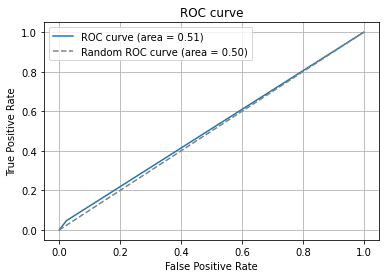

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# インスタンスの生成、3つの近傍点で投票を行う
knn_3 = KNeighborsClassifier(n_neighbors=3)

# 学習する
knn_3.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_3 = knn_3.predict(X_test_std)
print("Predict (3-nn): {}".format(y_pred_3))

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_3)

# ROC曲線
draw_ROC_curve(y_test, y_pred_3)

----------Logistic Regression-------------
Predict :  [0 0 0 ... 0 0 0]
Accuracy: 	0.92
Precision: 	0.00
Recall: 	0.00
f1: 		0.00
Confusion matrix:
[[2307    0]
 [ 193    0]]
auc: 0.5


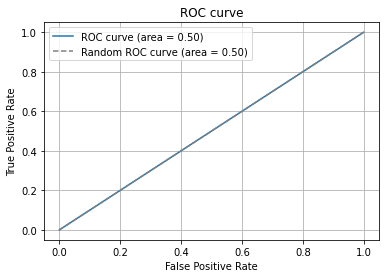

In [13]:
from sklearn.linear_model import LogisticRegression

print("----------Logistic Regression-------------")

# 学習する
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_lr = lr.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_lr)

# ROC曲線
draw_ROC_curve(y_test, y_pred_lr)

----------SVM-------------
Predict :  [0 0 0 ... 0 0 0]
Accuracy: 	0.92
Precision: 	0.00
Recall: 	0.00
f1: 		0.00
Confusion matrix:
[[2307    0]
 [ 193    0]]
auc: 0.5


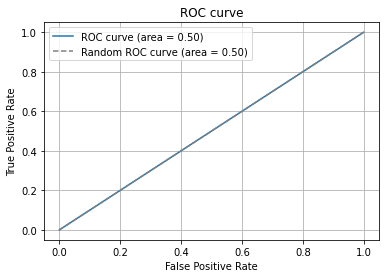

In [14]:

from sklearn import svm

print("----------SVM-------------")

# 学習する
clf = svm.SVC(probability=True)
clf.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_clf = clf.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_clf)

# ROC曲線
draw_ROC_curve(y_test, y_pred_clf)

----------Decision Tree-------------
Predict :  [0 0 0 ... 0 0 1]
Accuracy: 	0.84
Precision: 	0.08
Recall: 	0.10
f1: 		0.09
Confusion matrix:
[[2091  216]
 [ 174   19]]
auc: 0.5024087537141971


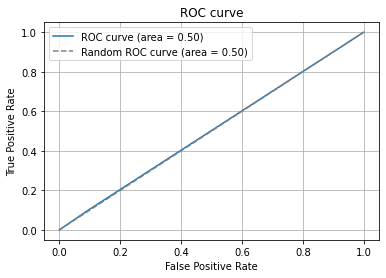

In [16]:
from sklearn.tree import DecisionTreeClassifier

print("----------Decision Tree-------------")

# 学習する
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_tree = tree.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_tree)

# ROC曲線
draw_ROC_curve(y_test, y_pred_tree)

----------Random Forest-------------
Predict :  [0 0 0 ... 0 0 0]
Accuracy: 	0.92
Precision: 	0.00
Recall: 	0.00
f1: 		0.00
Confusion matrix:
[[2306    1]
 [ 193    0]]
auc: 0.49978326831382747


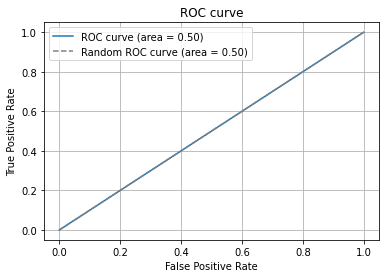

In [17]:
from sklearn.ensemble import RandomForestClassifier

print("----------Random Forest-------------")

# 学習する
RFC = RandomForestClassifier()
RFC.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_rfc = RFC.predict(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred_rfc)

# ROC曲線
draw_ROC_curve(y_test, y_pred_rfc)

## 【問題3】テストデータに対する推定
---
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。

正しく提出が行えていれば、精度は低くても構いません。

In [18]:
# テストデータを読み込む
df_test = pd.read_csv("application_test.csv")

df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [23]:
# 欠損値のデータを確認

# 数値で確認: 欠損値の数と％の表示
num_missing = df_test.isnull().sum().sort_values(ascending = False)
percent = (df_test.isnull().sum()/df_home.isnull().count()*100).sort_values(ascending = False)

home_missing = pd.concat([num_missing, percent], axis=1, keys=['num_missing', 'Percent'])

home_missing[home_missing['num_missing'] > 0]
# index_name = home_missing[home_missing['num_missing'] > 0].index
# print(index_name)


,num_missing,Percent
COMMONAREA_AVG,33495.0,10.892293
COMMONAREA_MODE,33495.0,10.892293
COMMONAREA_MEDI,33495.0,10.892293
NONLIVINGAPARTMENTS_AVG,33347.0,10.844165
NONLIVINGAPARTMENTS_MODE,33347.0,10.844165
...,...,...
OBS_30_CNT_SOCIAL_CIRCLE,29.0,0.009431
OBS_60_CNT_SOCIAL_CIRCLE,29.0,0.009431
DEF_60_CNT_SOCIAL_CIRCLE,29.0,0.009431
AMT_ANNUITY,24.0,0.007805


In [24]:
# 欠損値が1つでもあれば該当する列を削除する
print(df_test.shape)
df_test = df_test.dropna(axis=1, how="any")
df_test = df_test.dropna(axis=0, how="any")
print(df_test.shape)

(48744, 121)
(48744, 57)


In [25]:
df_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUM

In [26]:
X_df_test = df_test.loc[:, col_name]
print(X_df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DAYS_BIRTH                   48744 non-null  int64  
 1   REGION_RATING_CLIENT_W_CITY  48744 non-null  int64  
 2   REGION_RATING_CLIENT         48744 non-null  int64  
 3   DAYS_ID_PUBLISH              48744 non-null  int64  
 4   REG_CITY_NOT_WORK_CITY       48744 non-null  int64  
 5   FLAG_EMP_PHONE               48744 non-null  int64  
 6   DAYS_EMPLOYED                48744 non-null  int64  
 7   REG_CITY_NOT_LIVE_CITY       48744 non-null  int64  
 8   FLAG_DOCUMENT_3              48744 non-null  int64  
 9   DAYS_REGISTRATION            48744 non-null  float64
 10  REGION_POPULATION_RELATIVE   48744 non-null  float64
 11  LIVE_CITY_NOT_WORK_CITY      48744 non-null  int64  
 12  AMT_CREDIT                   48744 non-null  float64
 13  FLAG_DOCUMENT_6 

In [35]:
# 標準化
X_df_test_std = scaler.transform(X_df_test)
# 推定
y_pred_sub_proba = knn_3.predict_proba(X_df_test_std)


array([0.        , 0.        , 0.33333333, ..., 0.33333333, 0.33333333,
       0.33333333])

In [36]:
print(y_pred_sub_proba.shape)
print(y_pred_sub_proba[:,1])

(48744, 2)
[0.         0.         0.33333333 ... 0.33333333 0.33333333 0.33333333]


In [40]:
# Kaggleに提出するためにデータを加工
y_pred_sub_df = pd.DataFrame(y_pred_sub_proba[:,1])
y_pred_sub_df = y_pred_sub_df.rename(columns={0:"TARGET"})
y_pred_sub_df = pd.concat([df_test["SK_ID_CURR"], y_pred_sub_df], axis=1, join='inner')
y_pred_sub_df

,SK_ID_CURR,TARGET
0,100001,0.000000
1,100005,0.000000
2,100013,0.333333
3,100028,0.000000
4,100038,0.000000
...,...,...
48739,456221,0.333333
48740,456222,0.000000
48741,456223,0.333333
48742,456224,0.333333


In [41]:
# CSV ファイル (svm_pred.csv) として出力
y_pred_sub_df.to_csv("y_pred_sub_df.csv", index=False)

## 【問題4】特徴量エンジニアリング
---
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。

-    どの特徴量を使うか
-    どう前処理をするか


## 相関で説明変数を抽出する

In [745]:
df_corr = abs(df_home.corr()["TARGET"]).sort_values(ascending=False)
df_corr.head(20)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_MODE                 0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
Name: TARGET, dtype: float64

In [746]:
# データセットのラベルエンコーダー
def label_encoder(df, categorical_columns=None):
    if not categorical_columns:
        categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_columns:
        df[col], uniques = pd.factorize(df[col])
    return df, categorical_columns



In [747]:

col_name = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1','DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER',
       'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE','DAYS_EMPLOYED','REG_CITY_NOT_LIVE_CITY',
       'FLAG_DOCUMENT_3','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','DAYS_REGISTRATION']

# データのサンプルを抽出する
# df_sample = df_home.sample(n=10000, random_state=0)
# print(df_sample)
df_, le_encoded_cols = label_encoder(df_home, None)
df_ = df_.dropna(axis=0, how="any")

print(df_.shape)

X_df4 = df_.loc[:, col_name]
y_df4 = df_.loc[:, 'TARGET']

print(X_df4.info())
print(X_df4.shape)



(11351, 122)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11351 entries, 71 to 307482
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EXT_SOURCE_3                 11351 non-null  float64
 1   EXT_SOURCE_2                 11351 non-null  float64
 2   EXT_SOURCE_1                 11351 non-null  float64
 3   DAYS_BIRTH                   11351 non-null  int64  
 4   REGION_RATING_CLIENT_W_CITY  11351 non-null  int64  
 5   REGION_RATING_CLIENT         11351 non-null  int64  
 6   NAME_INCOME_TYPE             11351 non-null  int64  
 7   DAYS_LAST_PHONE_CHANGE       11351 non-null  float64
 8   CODE_GENDER                  11351 non-null  int64  
 9   DAYS_ID_PUBLISH              11351 non-null  int64  
 10  REG_CITY_NOT_WORK_CITY       11351 non-null  int64  
 11  FLAG_EMP_PHONE               11351 non-null  int64  
 12  DAYS_EMPLOYED                11351 non-null  int64  
 13  R

### 相関変数の高い順から20個を抽出し、TARGETの値をpredict_probaでクラスの分類確率で予測する。

In [748]:
import numpy as np
from sklearn.model_selection import train_test_split

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X_df4.values, y_df4.values, test_size=0.25, random_state=0, stratify=y_df4)

print("X_trainのshape：", X_train.shape)
print("X_testのshape：", X_test.shape)
print("y_trainのshape：", y_train.shape)
print("y_testのshape：", y_test.shape)

X_trainのshape： (8513, 19)
X_testのshape： (2838, 19)
y_trainのshape： (8513,)
y_testのshape： (2838,)


In [749]:
from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

Predict (50-nn): [0.02 0.02 0.12 ... 0.02 0.08 0.02]
auc: 0.6937674457359497


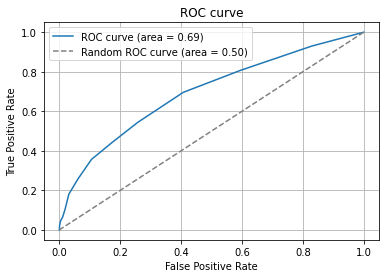

In [750]:
### from sklearn.neighbors import KNeighborsClassifier

# インスタンスの生成、60つの近傍点で投票を行う
knn_50 = KNeighborsClassifier(n_neighbors=50)

# 学習する
knn_50.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_50 = knn_50.predict_proba(X_test_std)[:, 1]
print("Predict (50-nn): {}".format(y_pred_50))

# ROC曲線
draw_ROC_curve(y_test, y_pred_50)

----------Logistic Regression-------------
auc: 0.7447643605952764


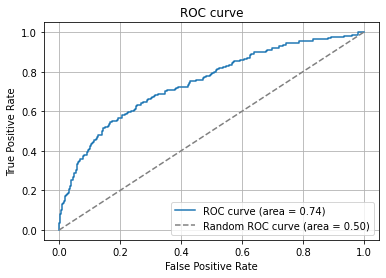

In [751]:
from sklearn.linear_model import LogisticRegression

print("----------Logistic Regression-------------")

# 学習する
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_lr = lr.predict_proba(X_test_std)[:, 1]

# ROC曲線
draw_ROC_curve(y_test, y_pred_lr)

----------SVM-------------
auc: 0.6229067857745852


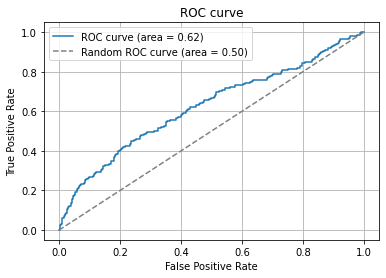

In [752]:
from sklearn import svm

print("----------SVM-------------")

# 学習する
clf = svm.SVC(probability=True)
clf.fit(X_train_std, y_train)

# 検証データで推定を行う
# y_pred_clf = clf.predict(X_test_std)
y_pred_clf = clf.predict_proba(X_test_std)[:, 1]

# 4種類の指標を表示
# evaluate_performance_model(y_test, y_pred_clf)

# ROC曲線
draw_ROC_curve(y_test, y_pred_clf)

----------Decision Tree-------------
auc: 0.5252205316440708


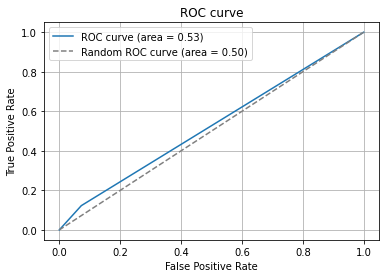

In [753]:
from sklearn.tree import DecisionTreeClassifier

print("----------Decision Tree-------------")

# 学習する
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)

# 検証データで推定を行う
y_pred_tree = tree.predict_proba(X_test_std)[:, 1]

# ROC曲線
draw_ROC_curve(y_test, y_pred_tree)

----------Random Forest-------------
auc: 0.7275735269933363


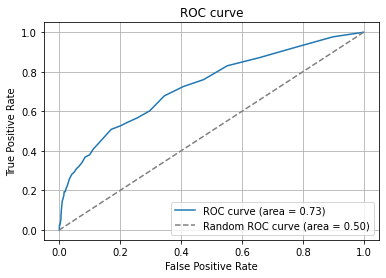

In [759]:
from sklearn.ensemble import RandomForestClassifier

print("----------Random Forest-------------")

# 学習する
RFC = RandomForestClassifier()
RFC.fit(X_train_std, y_train)

# 検証データで推定を行う
# y_pred_rfc = RFC.predict(X_test_std)
y_pred_rfc = RFC.predict_proba(X_test_std)[:, 1]

# ROC曲線
draw_ROC_curve(y_test, y_pred_rfc)

## まとめ
---
TARGETと相関関係が高いものを抽出することにより精度が高くなった。
また、TARGETの分類が0または1なので、それを分類確率に変換することでAUCも高くなった。
上記の前処理により、全体的なモデルの予測は高くなったと言える。
なお、ロジスティック回帰が0.74と最も高かった。


In [42]:
# 上記のモデルでKaggleに提出してみる

# Logistic Regression
y_pred_lr_sub = lr.predict_proba(X_df_test_std)[:, 1]

# Kaggleに提出するためにデータを加工
y_pred_sub_df2 = pd.DataFrame(y_pred_lr_sub)
y_pred_sub_df2 = y_pred_sub_df2.rename(columns={0:"TARGET"})
y_pred_sub_df2 = pd.concat([df_test["SK_ID_CURR"], y_pred_sub_df2], axis=1, join='inner')
y_pred_sub_df2

,SK_ID_CURR,TARGET
0,100001,0.064440
1,100005,0.071375
2,100013,0.043659
3,100028,0.051393
4,100038,0.149206
...,...,...
48739,456221,0.057841
48740,456222,0.113684
48741,456223,0.070590
48742,456224,0.129475


In [43]:
# CSV ファイル として出力
y_pred_sub_df2.to_csv("y_pred_sub_df2.csv", index=False)

In [47]:
# Random Forest
y_pred_sub_df3 = RFC.predict_proba(X_df_test_std)[:, 1]


# Kaggleに提出するためにデータを加工
y_pred_sub_df3 = pd.DataFrame(y_pred_sub_df3)
y_pred_sub_df3 = y_pred_sub_df3.rename(columns={0:"TARGET"})
y_pred_sub_df3 = pd.concat([df_test["SK_ID_CURR"], y_pred_sub_df3], axis=1, join='inner')
y_pred_sub_df3

,SK_ID_CURR,TARGET
0,100001,0.02
1,100005,0.03
2,100013,0.03
3,100028,0.05
4,100038,0.10
...,...,...
48739,456221,0.08
48740,456222,0.13
48741,456223,0.09
48742,456224,0.07


In [48]:
# CSV ファイル として出力
y_pred_sub_df3.to_csv("y_pred_sub_df3.csv", index=False)